- https://excelsior-cjh.tistory.com/171?category=940400

# 오차역전파 

- https://github.com/ExcelsiorCJH/Hands-On-ML/blob/master/Chap11-Training_DNN/Chap11_1-Training_DNN.ipynb

# 그래디언트 소실과 폭주 문제

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU
def ReLU(x):
    return np.maximum(0, x)

# tanh
def tanh(x):
    return np.tanh(x)

In [3]:
def weight_init(node_num, method=None):
    '''가중치 초기화 함수
    
    Args:
        - method: 가중치 초기화 방법(large, small, xavier, relu)
    Returns:
        - np.array형태의 가중치 초기값
    '''
    w = 0
    if method == 'large':
        w = np.random.randn(node_num, node_num) * 1
    elif method == 'small':
        w = np.random.randn(node_num, node_num) * 0.01
    elif method == 'xavier':
        w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)  # Xavier init
    elif method == 'he':
        w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # He init
    
    return w

In [ ]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

In [4]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init(node_num, 'small')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

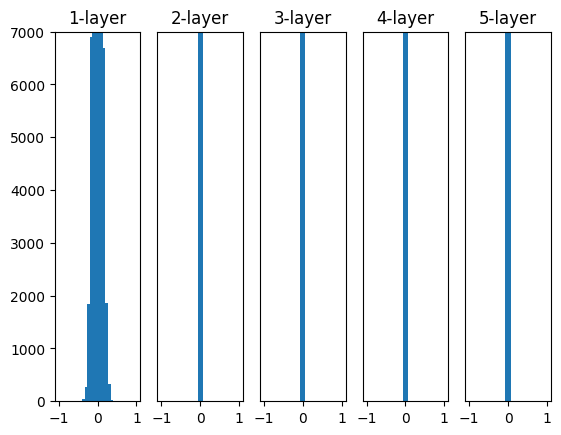

In [5]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

또한, 평균이 0이고 표준편차가 1인 정규분포를 따르는 값으로 랜덤하게 초기화하고 tanh를 활성화 함수로 사용하였을 경우에는 아래의 그림처럼 tanh의 출력이 -1과 1로 집중되면서 그래디언트 소실(vanishing gradient) 문제가 발생하게 된다.

In [6]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init(node_num, 'large')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

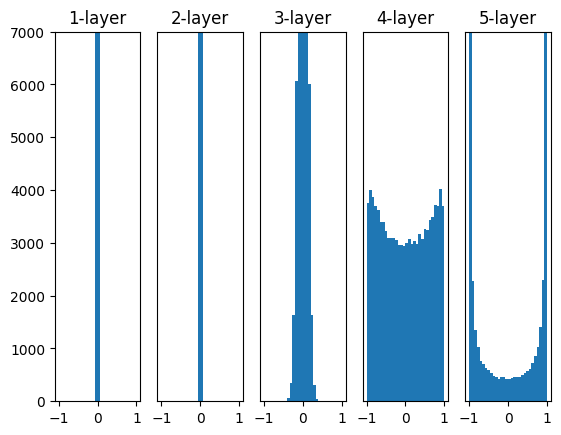

In [7]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()